<style>
#@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Basic Plotting in Python using Matplotlib

### Modules - Basics
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig, Peter Berg, Thorvald Ballestad, Niels Henrik Aase, Eilif Sommer Øyre and Jon Andreas Støvneng.
</section>
Last edited: Jan 2022, Tom Abel, added animation and example of exporting with np.savez to visualize with Veusz. Also discuss approaches to interpolation as part of plotting. 

___

The following is a brief introduction to plotting in Python, using the library `matplotlib`.
From the matplotlib [home page](http://matplotlib.org): _"matplotlib tries to make easy things easy and hard things possible."_
Let's get started!

In [1]:
import matplotlib.pyplot as plt
# This command imports the matplotlib-package pyplot, and defines plt as an alias for pyplot
import numpy as np
# This imports the the NumPy (Numerical Python) package, aliased as np.

Above we have imported `pyplot` (a `matplotlib` package containing all useful functions for plotting), and `numpy`, a package for scientific computing with Python.
You can learn more about `numpy` in [this](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/introduction_to_numpy.ipynb) notebook.
Also, notice how we have given shorter nicknames to both the `numpy` and `pyplot` import, in order to save some typing.

### The very basics of plotting
We use the function `plt.plot` to plot.
This command takes two arguments: a list of $x$-values and a list of $y$-values.
Each pair of $x$- and $y$-values will be a point, and a line will be drawn between these points.

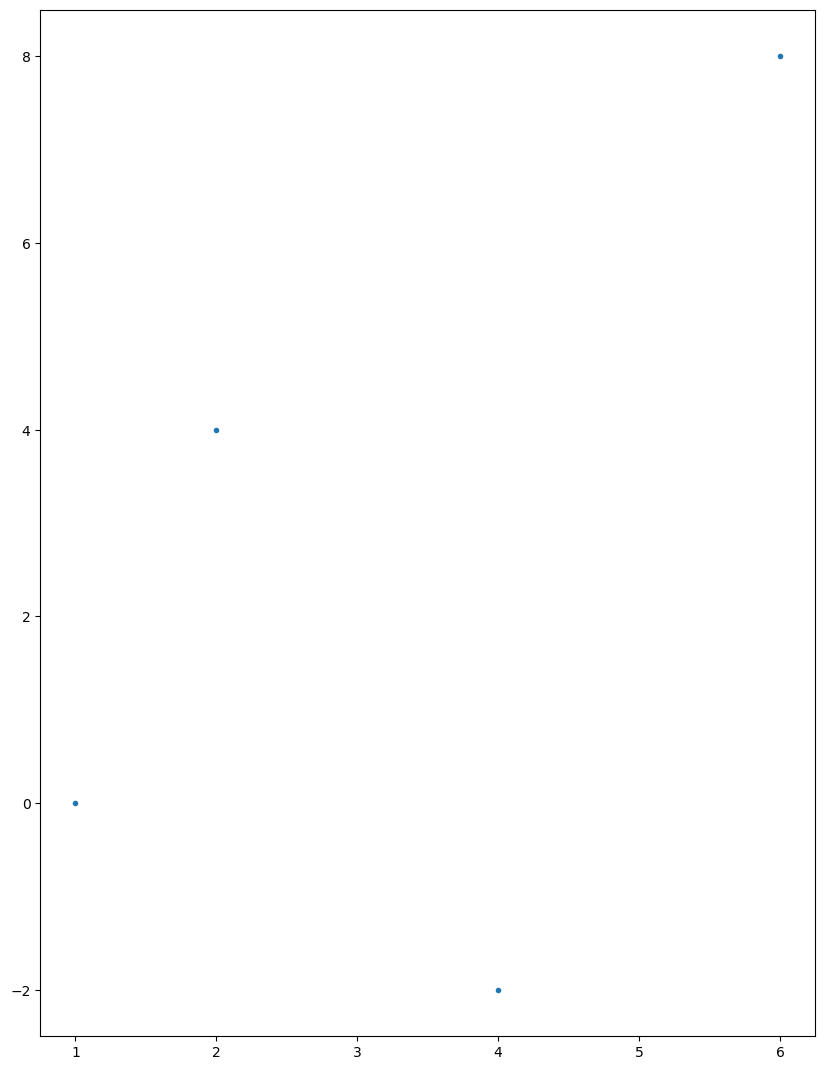

In [2]:
# Plot some arbitrary x- and y-values
x = [1, 2, 4, 6]  # List of x-values
y = [0, 4, -2, 8] # List of corresponding y-values
plt.plot(x, y, '.')    # Function to plot the x and y points
plt.show()        # Not necessary in notebook, but required if running python from command line

### Plotting a Function

__The task:__ 

Plotting a function $f$, given

$$y=f(x)$$

along an interval

$$x=[a,b].$$

__Example:__

We would like to plot the function

$$f(x)=3x^2+x-1$$

for the interval

$$x=[-1,2].$$

__Step 1: Defining the range of $x$__

We use the command

In [3]:
x = np.linspace(-1, 2, 301)  # Array of 301 linearly spaced points between -1 and 2

This creates an array of $301$ linearly spaced, discrete values of x between $-1$ and $2$.
Here we used a function from the `numpy` library.
If you are unfamiliar with `numpy`, and want to learn more about it, see [this] notebook.

__Step 2: Using the `plot` command__

As above, we use the `plt.plot` to plot the function.

In our case, we need to write

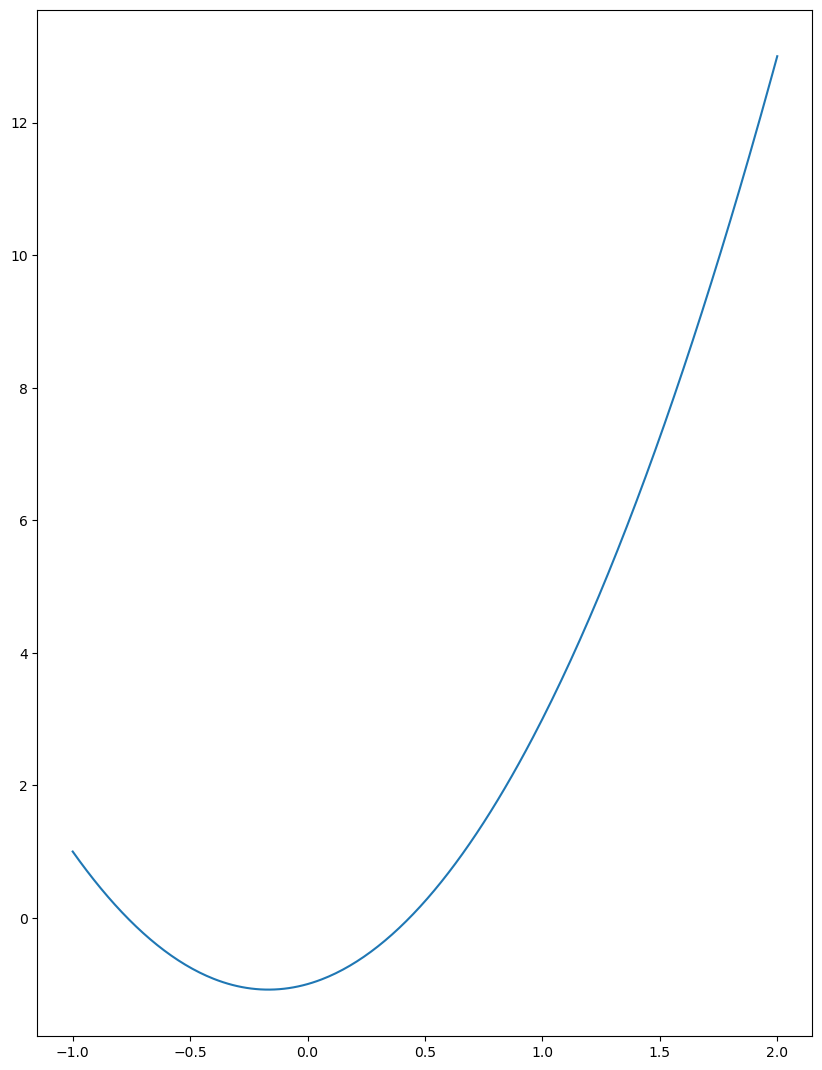

In [4]:
plt.plot(x, 3*x**2+x-1, '-')  # Remember, first argument is x-values, second is y-values
plt.show()

__Further Steps: Adding axes labels, a legend, a plot title, etc.__

We often want to add axes labels, a legend, a title, a grid etc. to the plot.
This is done by using the following commands:

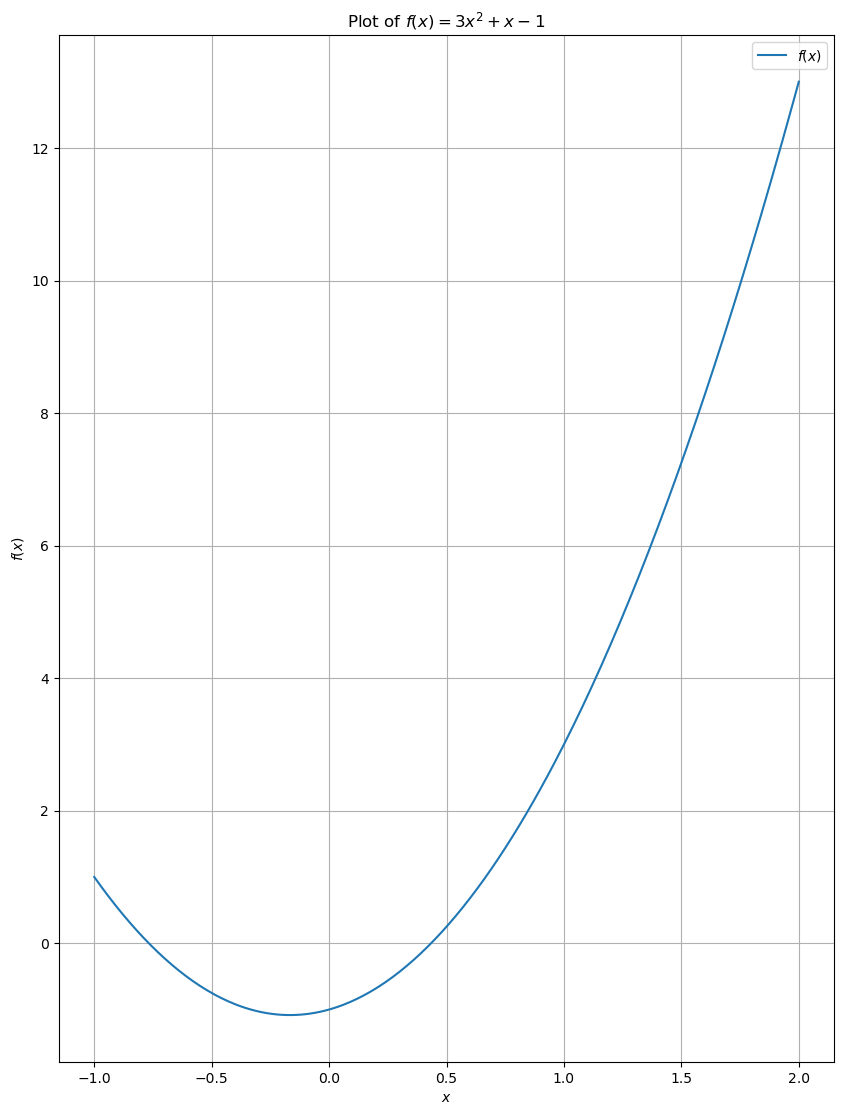

In [5]:
plt.plot(x, 3*x**2+x-1, label="$f(x)$") # Label is the text that will appear in the legend
plt.ylabel('$f(x)$')                    # Label on y-axis.
                                        # The dollar symbols means to use LaTeX
plt.xlabel('$x$')                       # Label on x-axis
plt.title('Plot of $f(x)=3x^2+x-1$')    # Plot title
plt.legend()                            # Add legend
plt.grid()                              # Add grid
plt.show()

Comment and uncomment the various commands to see how they effect the plot. Also notice how we used $\LaTeX$ syntax for math in labels and title by encapsulating the text in `$`-signs.

You can also change the size of the figure quickly by using the following command:

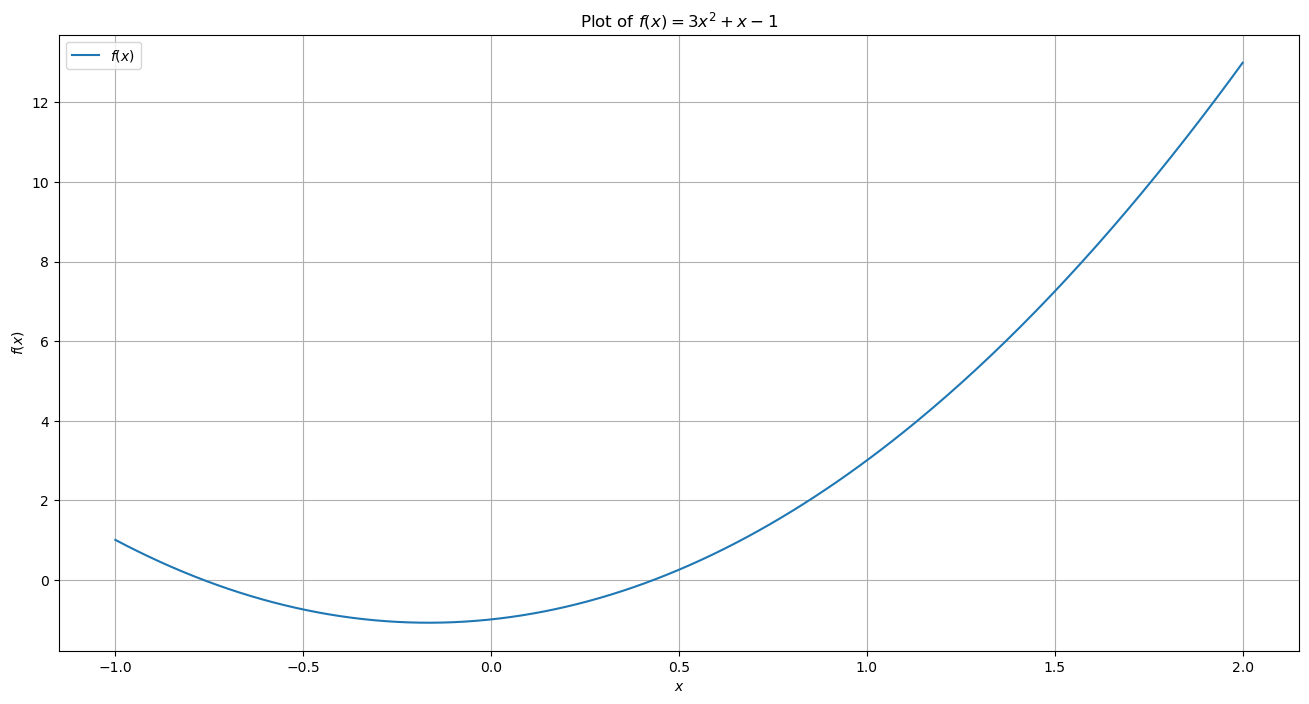

In [6]:
plt.figure(figsize=(16, 8))            # Create figure and change size

# The same as previous example
plt.plot(x, 3*x**2+x-1, label="$f(x)$")
plt.ylabel('$f(x)$')                   # Label on y-axis
plt.xlabel('$x$')                      # Label on x-axis
plt.title('Plot of $f(x)=3x^2+x-1$')   # Plot title
plt.legend()                           # Add legend
plt.grid()                             # Grid
plt.show()

The `plt.figure()` command also lets you set other parameters related to the figure appearance.
In most of the other modules and examples at NumFys, we have set common figure parameters in the beginning of the module/example, by using the following lines of code:

In [7]:
# Set figure parameters for all plots
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300,
             'lines.linewidth': 1.0, 'figure.figsize': (16, 8),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,}
plt.rcParams.update(newparams)

### Multiple Functions in One Plot

Let us plot

$$g(x)=3x^3+1$$

in addition to our previous function:

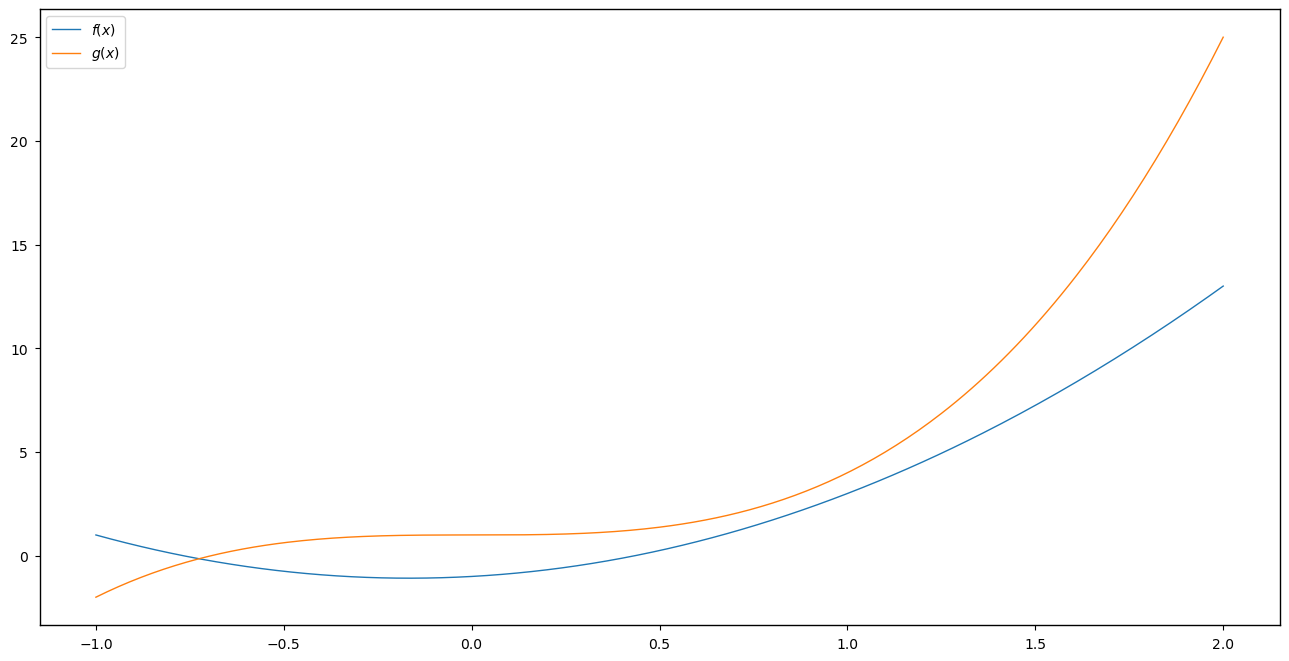

In [8]:
plt.plot(x, 3*x**2+x-1, label="$f(x)$")
plt.plot(x, 3*x**3+1, label="$g(x)$")
# Create legend
plt.legend()
plt.show()


## Animations
[matplotlib](https://matplotlib.org/) also has some support for animation which can be very helpful in gaining a physical intuition and study dependence of results on various input parameters.  

In [9]:
from matplotlib import animation
from IPython.display import HTML

def SolveHarmOscAnalytic(tfinal, h, w0, phase):
    N = int(tfinal/h)
    h = tfinal/N
    t = np.arange(N)*h
    x = np.cos(w0*t + phase)
    v = -w0*np.sin(w0*t + phase)
    return x, v, t

def HarmMovie(solver, h=1.0, tfinal=2*2.0*np.pi, w0=1.0, phase=1.0):
    x, v, t = solver(tfinal, h, w0, phase)
    
    skiprate = int(len(t) / 100)
    skiprate = max(skiprate, 1)
    t = t[::skiprate]
    x = x[::skiprate]
    v = v[::skiprate]
    # create a simple animation
    fig, ax = plt.subplots(figsize=(6,6))

    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    ax.set_aspect(aspect=1)
    line, = ax.plot([], [], 'x-', lw=3, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('v')
    plt.close() # this makes sure the empty initial plot is not shown separately
    
    def init():
        line.set_data([], [])
        return line,
    
    def animate(i):
        line.set_data(x[0:i], v[0:i]);
        return line,
    
    return animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(t), interval=60, blit=True)

In [10]:
anim = HarmMovie(SolveHarmOscAnalytic, h=0.3);
HTML(anim.to_jshtml())

In [11]:
x, v, t = SolveHarmOscAnalytic(3*2*np.pi, .1, 1, .3)
x2, v2, t2 = SolveHarmOscAnalytic(63*2*np.pi, .1, 2, .3)
outfile = "xvt.npz"
np.savez(outfile, x=x, v=v,t=t,x2=x2, v2=v2,t2=t2)

This file `/tmp/xvt.npz` then can be read by [Veusz](https://veusz.github.io) conveniently using the Numpy NPZ import plugin. This will make it easy to make good looking plots that look exactly as you wish. 


## Interactivity

Another very helpful approach is to make you plots interactive. 
This way you can explore your problem and have fun playing with the inputs. 
````{note}
This will only be truly interactive when you run the jupyter notebook yourself but not on the website of this book. 
````

In [14]:
from ipywidgets import interact

def plot_sine_curve(phase, amplitude):
    x = np.linspace(0, 2*np.pi, 1000)
    y = amplitude * np.sin(x + phase)
    plt.plot(x, y)
    plt.ylim(-1.5, 1.5)
    plt.show()

interact(plot_sine_curve, phase=(0, 2*np.pi), amplitude=(0.1, 1.0));

interactive(children=(FloatSlider(value=3.141592653589793, description='phase', max=6.283185307179586), FloatS…

## Interpolation

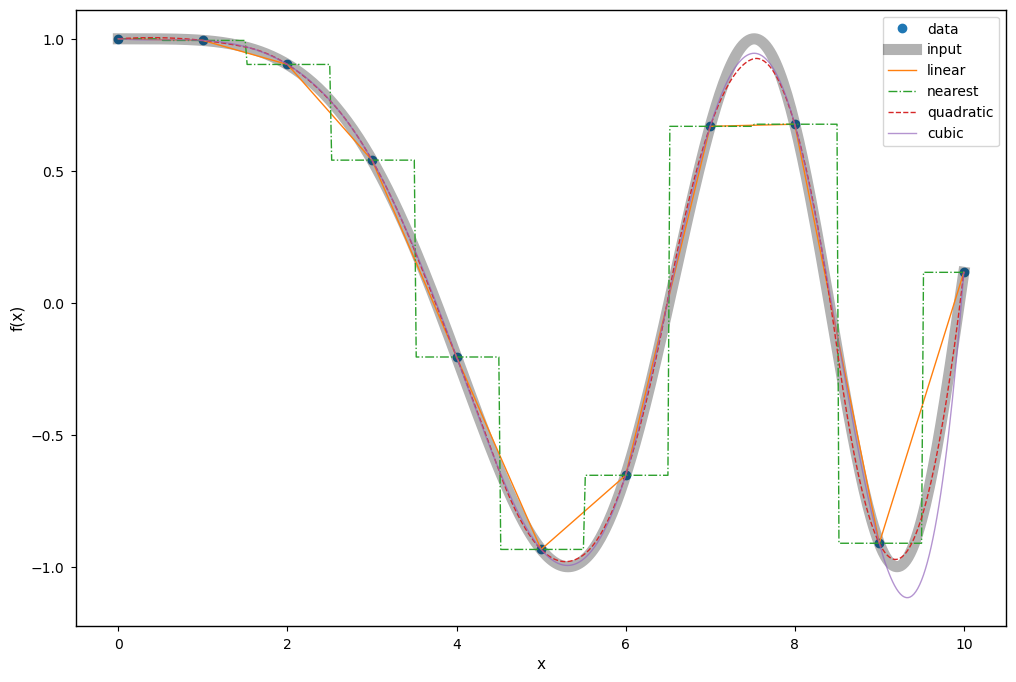

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Define x, y, and xnew to resample at.
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

xnew = np.linspace(0, 10, num=441, endpoint=True)
ya = np.cos(-xnew**2/9.0)

# Define interpolators.
f_linear = interp1d(x, y)
f_slinear = interp1d(x, y, kind='slinear')
f_near = interp1d(x, y, kind='nearest')
f_quadratic = interp1d(x, y, kind='quadratic')
f_cubic = interp1d(x, y, kind='cubic')

# Plot.
fig = plt.figure(figsize=(12,8))
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, ya, '-', label='input',c="black",lw=8,alpha=.3)
plt.plot(xnew, f_linear(xnew), '-', label='linear')
#plt.plot(xnew, f_slinear(xnew), '-', label='slinear', alpha=.4)
plt.plot(xnew, f_near(xnew), '-.', label='nearest')
plt.plot(xnew, f_quadratic(xnew), '--', label='quadratic')
plt.plot(xnew, f_cubic(xnew), '-', label='cubic',alpha=.7)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend(loc='best')
plt.show()

ofile = "./interp.npz"  # write data to disk for Veusz
np.savez(ofile, xin=x, yin=y, xnew=xnew, f_input=ya, f_linear=f_linear(xnew), \
    f_quadratic=f_quadratic(xnew), f_near=f_near(xnew), f_cubic=f_cubic(xnew))

### On your own
- Explore what we need to change so that we can also extrapolate the function. 
- Make the plot above from -2 through 12 on x-axis to see how extrapolation works for the different interpolators. 

## Final Note
There are many more commands and options for plotting functions than presented in this module.

Have a look at the [matplotlib](https://matplotlib.org/) and [pyplot](https://matplotlib.org/users/pyplot_tutorial.html) online references when additional plotting features are required.